# API de scikit-learn

<div class="alert alert-block alert-info">
Scikit-learn es la librería más usada de Machine Learning tradicional [Ver ranking de Github (https://github.com/showcases/machine-learning). 
La librería incluye funcionalidades de:
- Preprocesamiento de datos en  `sklearn.preprocessing`
- Algoritmos de Machine Learning en `sklearn.linear_model, sklearn.svm, sklearn.ensemble,` y muchos más.
- Evaluación de modelos en sklearn.model_selection y sklearn.metrics


> Scikit-learn sigue muy de cerca los resultados de la investigación e implementa los resultados más maduros y probados en sus modulos. La [documentación](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) extensa muestra como la librería es un compendio de conocimiento en Machine Learning llevado a software

## Estimador

<img src='./img/estimador_sklearn.png'/>

<img src='img/estimador_con_train_split.png' />

<div class="alert alert-success" >
  Para poder escoger el estimator apropiado una excelente guia es el __[cheatsheet](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)__ siguiente, hecho por uno de los core-dev de scikit-learn.

<img src='img/cheatsheet.png' />

# 1-Analizando las primeras predicciones de un modelo simple de regresión

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [8]:
X = pd.read_csv('datasets/X.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [28]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [29]:
model = Lasso()

In [30]:
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
predicted = model.predict(X_test)

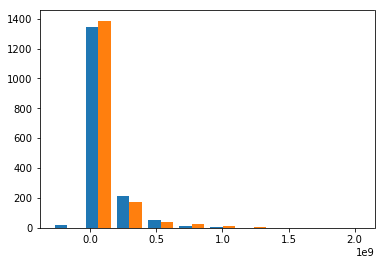

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted,y_test]);

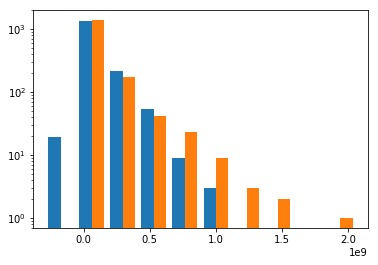

In [36]:
# Otra forma de ver el histograma
plt.hist([predicted, y_test], log=True);

## Evaluar para Ajustar el modelo

<div class="alert alert-success" >
  Una guia para buscar un bueno modelo y evitar el **Underfitting y Overfitting**: 
  - Que el error de Entrenamiento y test no muy altos.
  - Que la diferencia entres ambos errores sea pequeña $\ll 1$
  - Que el **score R2** sea >= 0.70, mientras mas cerca de 1, mejor. Un R2 negativo es peor que una media fija

<div class='alert alert-info'>
El objeto estimador añade por defecto la función `estimator.score` que viene con una de las métricas de  `sklearn.metrics`, que es la métrica sklearn.metric.r2_score

In [40]:
model.score(X_test,y_test)

0.58035978610190675

> Un buen score R2 es importante para una regresión. Ya que una métrica no logra siempre encodear todas las caracteristicas de una distribución de probabilidades. Un ejemplo es el siguiente:

<img src='img/metricasiguales_datosdistintos.png' \>

### Visualizar los resultados

In [42]:
residuals = y_test - predicted

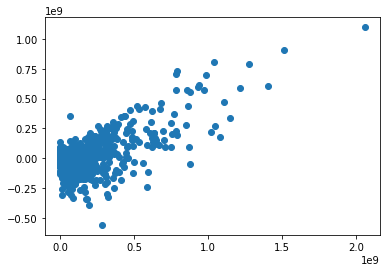

In [43]:
plt.scatter(y_test,residuals)

> No deben existir **patrones lejos de 0**, lo que se busca es mejorar los puntos **muy lejanos** del 0

In [50]:
# Ver errores en porcentaje
# Normalizar para tener el porcentaje de error mas que el valor absoluto (abs) del error
ap_residuals = np.abs(residuals) / y_test

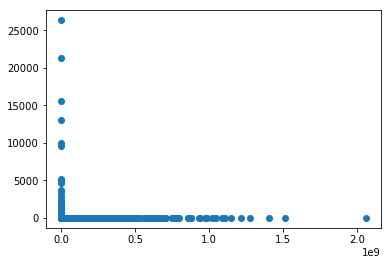

In [49]:
plt.scatter(y_test,ap_residuals)

> Se aprecia gran parte en 0, sin embargo para las peliculas pequeñas hay errores bastante altos

In [52]:
#Ocupar escala logaritmica para vizualizar mejor los resultados anteriores que estan lejos del grupo concentrado en 0
# valos absoluto, porcentaje y logoritmo, para ver las cosas en forma de magninut es de forma absoluta
lap_residuals = np.log(ap_residuals)

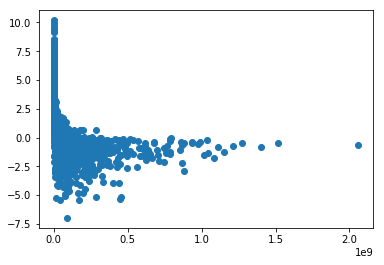

In [53]:
plt.scatter(y_test,lap_residuals)

### Apreciación numerica de los errores

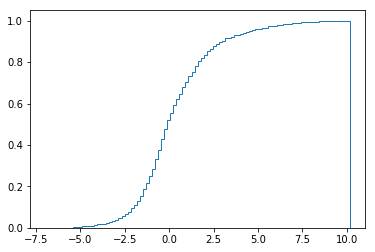

In [55]:
# Diagrama: Función cumulativa de la distribucion de los errores
plt.hist(lap_residuals,bins=100, normed=1, histtype='step', cumulative=True);

> De 100%, hay al menos sin error para el 60% de los datos, y para el 40% hay un 10% de error

array([ 0.13533528,  0.22313016,  0.36787944,  0.60653066,  1.        ])

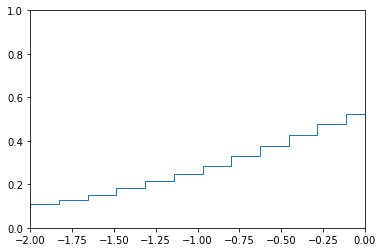

In [59]:
plt.hist(lap_residuals,bins=100, normed=1, histtype='step', cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

> En el acercamiento se observa en el eje de porcentaje de datos **Y**, como el eje de porcentaje de error **X**, como el 50% solo posee un 2.5% de error